# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


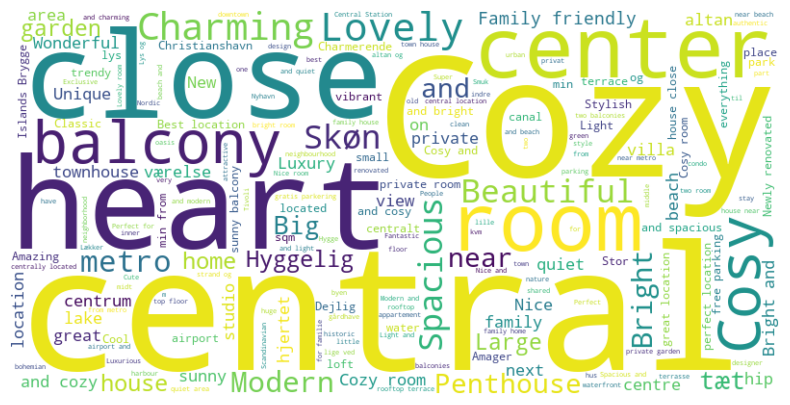

In [82]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

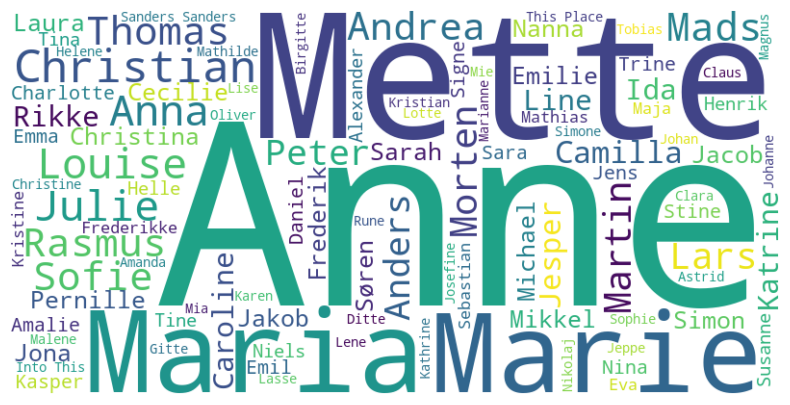

In [83]:
# State your solution here. Add more cells if needed.

host_names = data_filtered['host_name'].dropna().astype(str)
business_words = ['airbnb', 'rental', 'apartment', 'home', 'house', 'property', 'stay', 'hosting', 
                  'management', 'company', 'group', 'team', 'service', 'copenhagen', 'cph']

def is_person_name(name):
    name_lower = name.lower()
    # Remove if contains numbers
    if any(char.isdigit() for char in name):
        return False
    # Remove if contains business-related words
    if any(word in name_lower for word in business_words):
        return False
    # Remove if too long (likely business names)
    if len(name) > 30:
        return False
    return True

# Filter for person names only
person_names = [name for name in host_names if is_person_name(name)]

text = ' '.join(person_names)

name_stopwords = ['and', 'og', '&', 'the', 'de', 'van', 'von', 'el', 'la']

namesworldcloud = WordCloud(stopwords=name_stopwords, background_color="white", 
                           width=800, height=400, max_words=100).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(namesworldcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

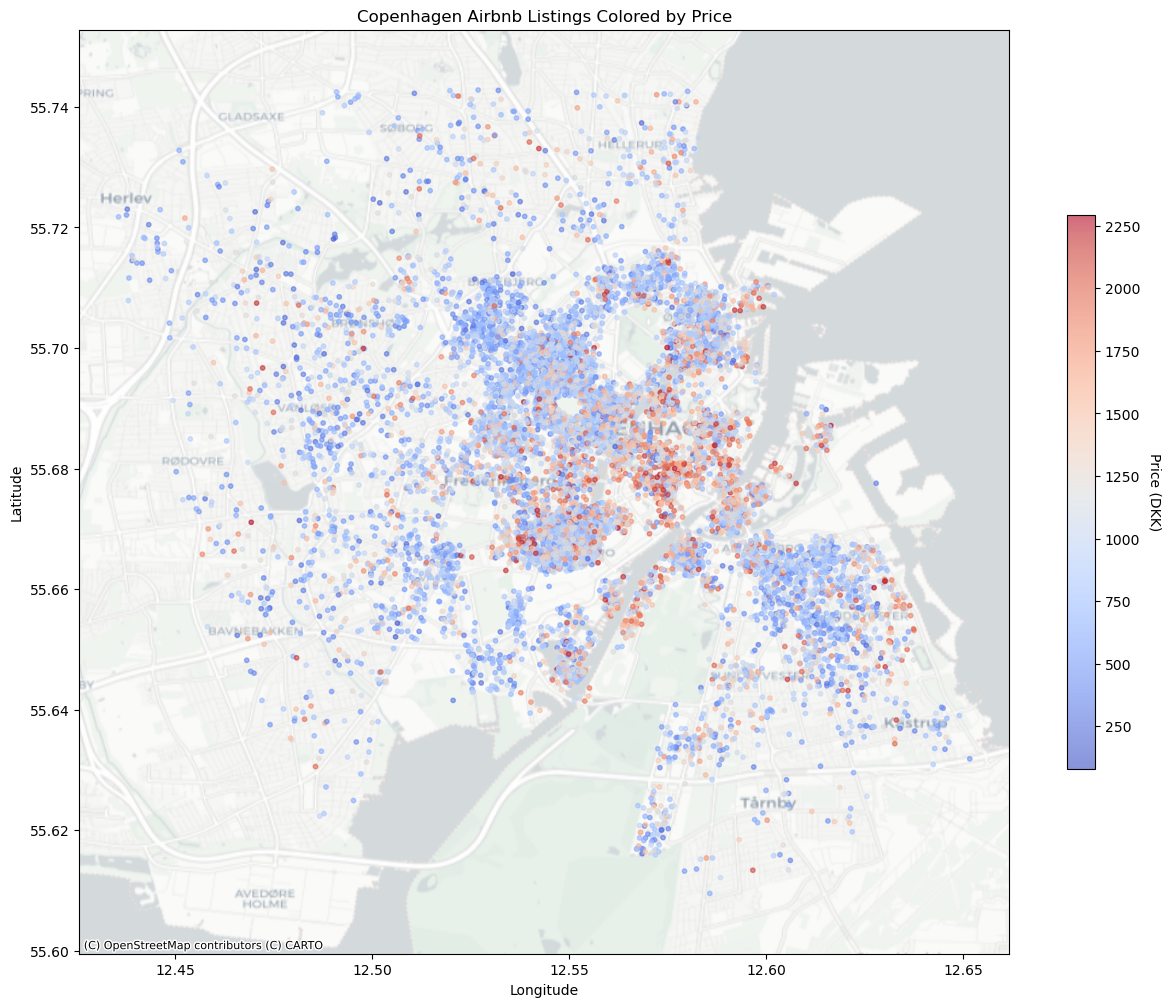

In [84]:
# State your solution here. Add more cells if needed.
import contextily as ctx
price_cap = data_filtered['price'].quantile(0.95)
data_plot = data_filtered[data_filtered['price'] < price_cap]

fig, ax = plt.subplots(figsize=(15, 12))
scatter = ax.scatter(data_plot['longitude'], data_plot['latitude'], 
            c=data_plot['price'], cmap='coolwarm', alpha=0.6, s=10, )

ax.set_xlim(data_plot['longitude'].min() - 0.01, data_plot['longitude'].max() + 0.01)
ax.set_ylim(data_plot['latitude'].min() - 0.01, data_plot['latitude'].max() + 0.01)


ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Positron)

cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Price (DKK)', rotation=270, labelpad=15)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Copenhagen Airbnb Listings Colored by Price')
plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

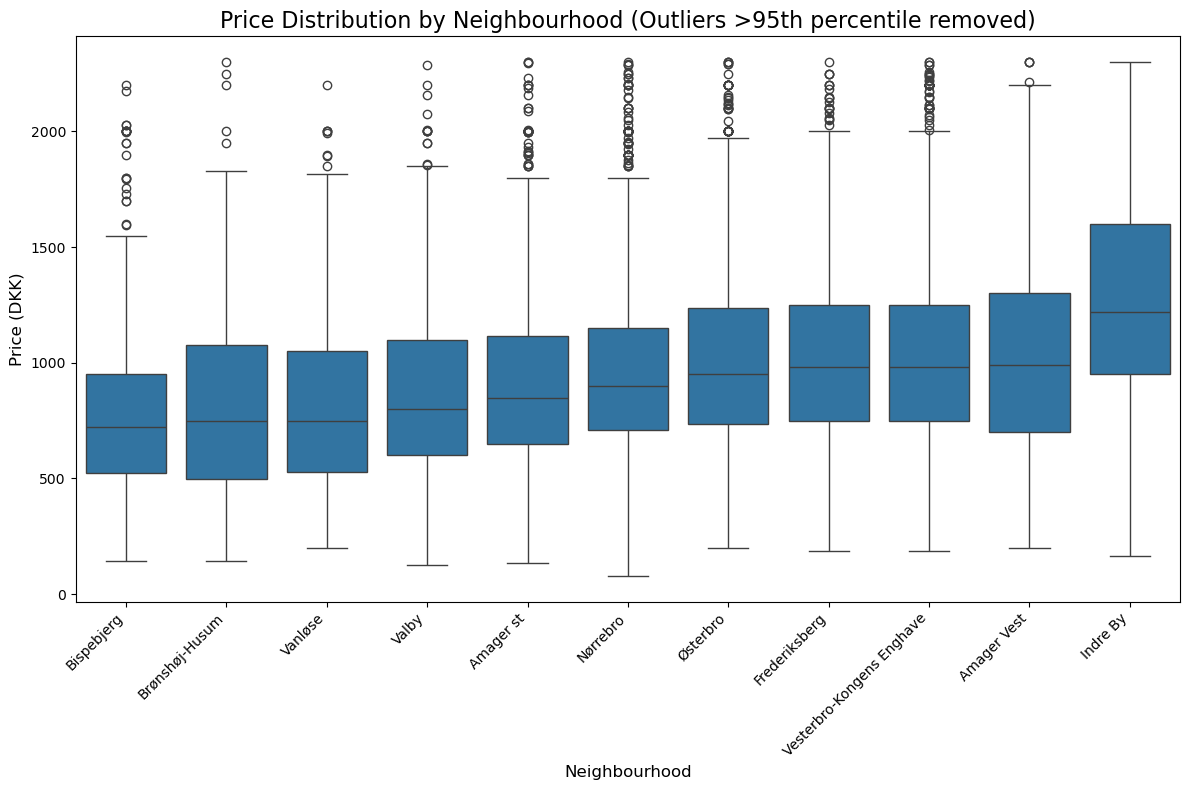

In [85]:
# State your solution here. Add more cells if needed.
import seaborn as sns
import matplotlib.pyplot as plt

price_limit = data_filtered['price'].quantile(0.95)
data_for_plot = data_filtered[data_filtered['price'] <= price_limit]

plt.figure(figsize=(12, 8))

sns.boxplot(x='neighbourhood_cleansed', y='price', data=data_for_plot, order= data_for_plot.groupby('neighbourhood_cleansed')['price'].median().sort_values().index)

plt.xticks(rotation=45, ha='right') # Rotate neighborhood names
plt.title('Price Distribution by Neighbourhood (Outliers >95th percentile removed)', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Price (DKK)', fontsize=12)
plt.tight_layout() # Adjust plot to prevent labels from overlapping
plt.show()


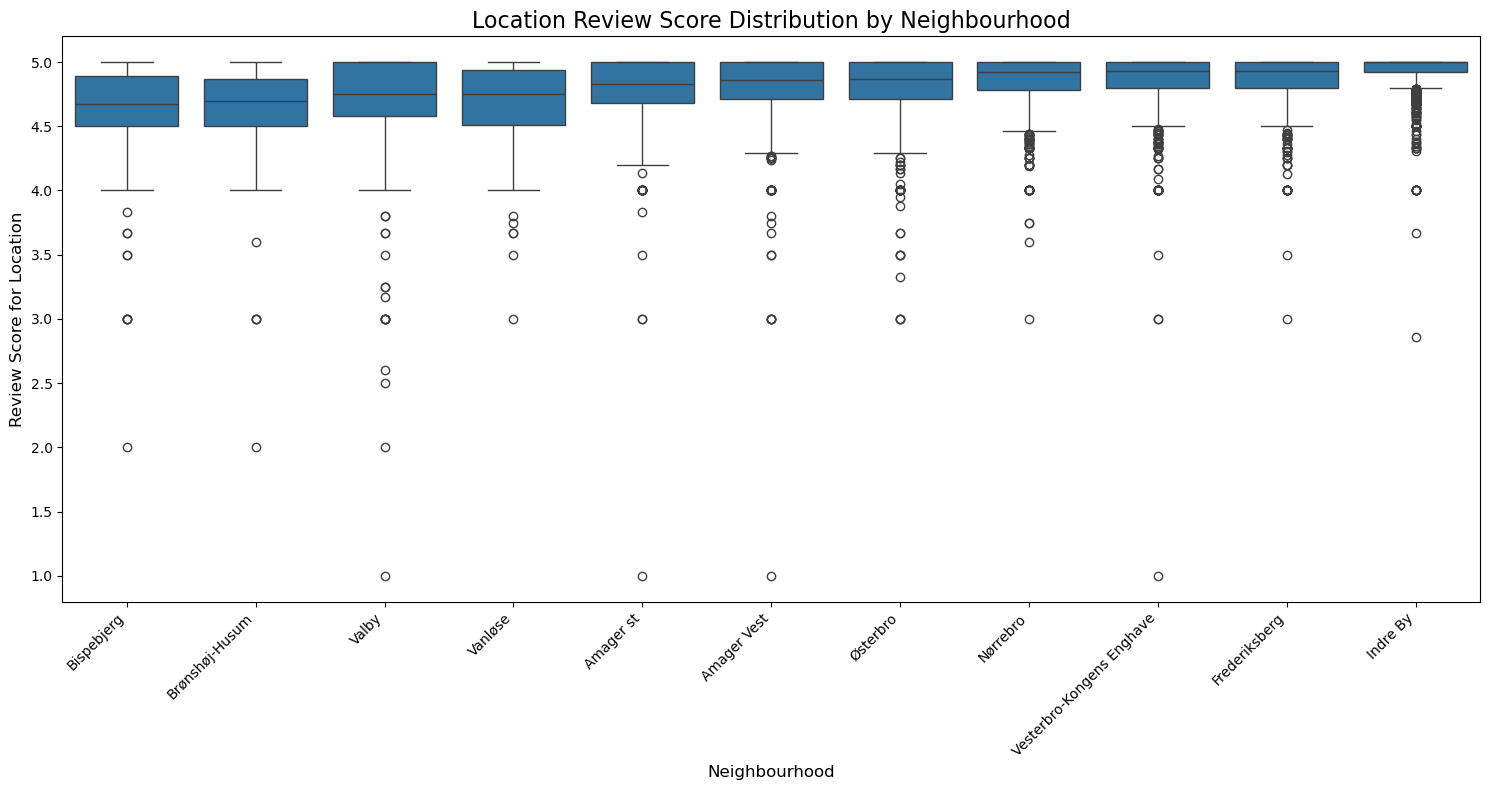

In [86]:
plt.figure(figsize=(15, 8))

sns.boxplot(
    x='neighbourhood_cleansed',
    y='review_scores_location',
    data=data_filtered,
    order=data_filtered.groupby('neighbourhood_cleansed')['review_scores_location'].median().sort_values().index # Order by median score
)

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.title('Location Review Score Distribution by Neighbourhood', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Review Score for Location', fontsize=12)
plt.tight_layout()
plt.show()

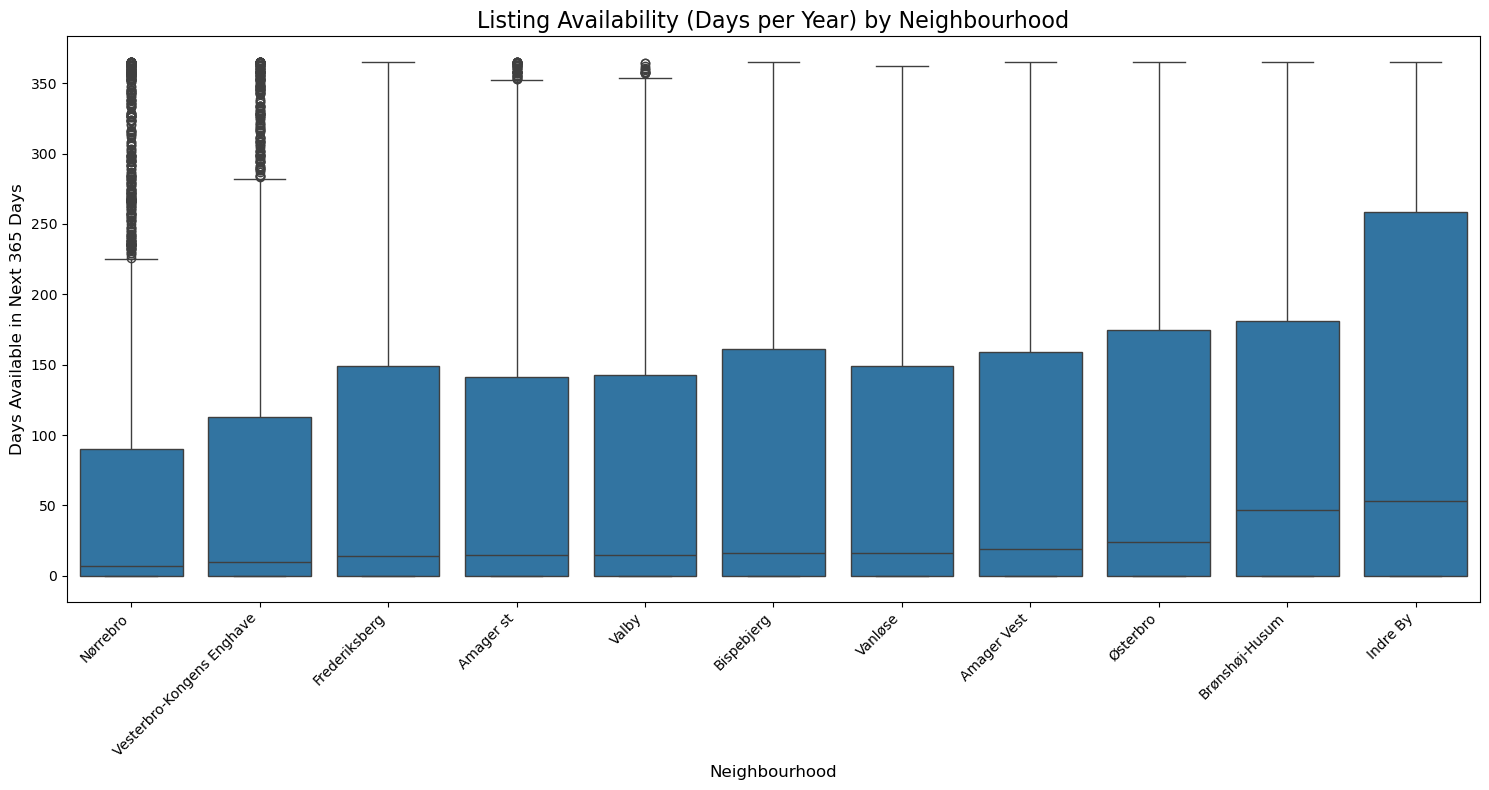

In [87]:
plt.figure(figsize=(15, 8))

# Create the boxplot for availability_365
sns.boxplot(
    x='neighbourhood_cleansed',
    y='availability_365',
    data=data_filtered,
    order=data_filtered.groupby('neighbourhood_cleansed')['availability_365'].median().sort_values().index
)

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.title('Listing Availability (Days per Year) by Neighbourhood', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Days Available in Next 365 Days', fontsize=12)
plt.tight_layout()
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [88]:
# State your solution here. Add more cells if needed.

data_filtered_by_neighbourhood = data_filtered.groupby('neighbourhood_cleansed')['price'].describe()
display(data_filtered_by_neighbourhood)


,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Amager Vest,1059.0,1205.754485,2121.656424,200.0,722.00,1000.0,1400.00,64900.0
Amager st,924.0,1019.860390,704.769611,135.0,650.00,851.0,1190.00,10000.0
Bispebjerg,604.0,912.066225,1831.810612,143.0,542.25,747.5,961.00,44000.0
Brønshøj-Husum,285.0,875.487719,552.009744,145.0,500.00,750.0,1100.00,4462.0
Frederiksberg,1177.0,1216.676296,1866.619993,185.0,750.00,1000.0,1339.00,58000.0
Indre By,1844.0,1570.907267,1065.975980,165.0,995.00,1350.0,1870.50,20000.0
Nørrebro,2057.0,1014.792902,609.390458,79.0,720.00,900.0,1199.00,12500.0
Valby,539.0,932.137291,622.836251,127.0,600.00,800.0,1119.50,7429.0
Vanløse,298.0,874.543624,502.561017,200.0,536.75,750.5,1091.75,3643.0


In [89]:
print("\n--- Counts of Room Types by Neighbourhood ---")
room_type_counts = pd.crosstab(data_filtered['neighbourhood_cleansed'], data_filtered['room_type'])
display(room_type_counts)


--- Counts of Room Types by Neighbourhood ---


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_cleansed,,,,
Amager Vest,909,0,148,2
Amager st,791,3,129,1
Bispebjerg,508,0,95,1
Brønshøj-Husum,216,0,67,2
Frederiksberg,1044,0,133,0
Indre By,1702,10,128,4
Nørrebro,1889,0,165,3
Valby,450,0,89,0
Vanløse,254,0,44,0


In [90]:
median_prices = data_filtered.groupby('neighbourhood_cleansed')['price'].median()
display(median_prices.to_frame(name='median_price'))


,median_price
neighbourhood_cleansed,
Amager Vest,1000.0
Amager st,851.0
Bispebjerg,747.5
Brønshøj-Husum,750.0
Frederiksberg,1000.0
Indre By,1350.0
Nørrebro,900.0
Valby,800.0
Vanløse,750.5


In [91]:
room_type_mode = room_type_counts.idxmax(axis=1)
display(room_type_mode.to_frame(name='mode'))

,mode
neighbourhood_cleansed,
Amager Vest,Entire home/apt
Amager st,Entire home/apt
Bispebjerg,Entire home/apt
Brønshøj-Husum,Entire home/apt
Frederiksberg,Entire home/apt
Indre By,Entire home/apt
Nørrebro,Entire home/apt
Valby,Entire home/apt
Vanløse,Entire home/apt


In [92]:
review_score_stats = data_filtered.groupby('neighbourhood_cleansed')['review_scores_rating'].describe()
display(review_score_stats)


,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Amager Vest,1059.0,4.815080,0.308644,1.0,4.7500,4.90,5.0,5.0
Amager st,924.0,4.798214,0.279165,1.0,4.7000,4.87,5.0,5.0
Bispebjerg,604.0,4.796424,0.281760,3.0,4.7000,4.89,5.0,5.0
Brønshøj-Husum,285.0,4.777789,0.292324,3.0,4.6700,4.87,5.0,5.0
Frederiksberg,1177.0,4.829167,0.283049,0.0,4.7500,4.93,5.0,5.0
Indre By,1844.0,4.771903,0.290467,2.0,4.6700,4.86,5.0,5.0
Nørrebro,2057.0,4.806155,0.262467,2.5,4.7100,4.88,5.0,5.0
Valby,539.0,4.766994,0.360935,1.0,4.6700,4.88,5.0,5.0
Vanløse,298.0,4.773960,0.288201,3.0,4.6725,4.83,5.0,5.0


In [93]:
print("\n--- Custom Descriptive Statistics for Price by Neighbourhood ---")
custom_price_stats = data_filtered.groupby('neighbourhood_cleansed')['price'].agg(
    mean_price='mean',
    median_price='median',      # Explicitly calculate the median
    std_deviation='std',
    variance='var',
    min_price='min',
    max_price='max',
    count='count'
)

display(custom_price_stats.round(2))


--- Custom Descriptive Statistics for Price by Neighbourhood ---


,mean_price,median_price,std_deviation,variance,min_price,max_price,count
neighbourhood_cleansed,,,,,,,
Amager Vest,1205.75,1000.0,2121.66,4501425.98,200.0,64900.0,1059
Amager st,1019.86,851.0,704.77,496700.20,135.0,10000.0,924
Bispebjerg,912.07,747.5,1831.81,3355530.12,143.0,44000.0,604
Brønshøj-Husum,875.49,750.0,552.01,304714.76,145.0,4462.0,285
Frederiksberg,1216.68,1000.0,1866.62,3484270.20,185.0,58000.0,1177
Indre By,1570.91,1350.0,1065.98,1136304.79,165.0,20000.0,1844
Nørrebro,1014.79,900.0,609.39,371356.73,79.0,12500.0,2057
Valby,932.14,800.0,622.84,387925.00,127.0,7429.0,539
Vanløse,874.54,750.5,502.56,252567.58,200.0,3643.0,298


### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [94]:
# State your solution here. Add more cells if needed.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Taregt
y = data_filtered['price_category']

#Features
features = ['latitude', 'longitude', 'review_scores_rating', 'review_scores_location', 'review_scores_value', 'availability_365', 'room_type']

X = data_filtered[features].copy()

#One hot encoding 

X = pd.get_dummies(X, columns=['room_type'], drop_first=True)

display(X.head())

display(y.head())

,latitude,longitude,review_scores_rating,review_scores_location,review_scores_value,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,55.686410,12.547410,4.78,4.73,4.71,0,False,False,False
1,55.693070,12.576490,4.91,4.94,4.81,303,False,False,False
2,55.676020,12.575400,4.53,4.89,4.59,56,False,False,False
3,55.670230,12.555040,4.92,4.87,4.80,59,False,False,False
4,55.666602,12.555283,4.88,4.80,4.53,0,False,False,False


0    0
1    1
2    1
3    0
4    1
Name: price_category, dtype: int64

In [95]:
#Splitting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 9700 samples
Test set size: 2426 samples


In [96]:
#We need to scale the data since we have very different features 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # We are using the same scaler as for the training data

print("\n--- Scaled Training Data (first 5 rows): ---")
print(X_train_scaled[:5])


--- Scaled Training Data (first 5 rows): ---
[[-0.60462755  1.14038429  0.6796897   0.67737345  0.58104701 -0.72479795
  -0.03212463  2.83698915 -0.03663338]
 [-0.90482166  0.84838657 -1.03615346 -0.75879784 -0.69981748 -0.66590506
  -0.03212463 -0.35248637 -0.03663338]
 [ 1.16243505 -0.90269199 -0.3498162  -1.26339857 -1.34024973 -0.73321121
  -0.03212463 -0.35248637 -0.03663338]
 [ 0.85311504 -0.35349421 -0.17823188  0.21158817 -0.50768781 -0.73321121
  -0.03212463 -0.35248637 -0.03663338]
 [-0.52585661 -1.96326403  0.06198616 -0.37064344  0.32487411 -0.66590506
  -0.03212463 -0.35248637 -0.03663338]]


In [101]:
#Create the model 

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

#Make predictions 
y_pred = knn.predict(X_test_scaled)

# Let's look at the first 20 predictions vs the actual values
print("--- Predictions vs. Actual Values ---")
print(f"Predictions: {y_pred[:20]}")
print(f"Actuals:     {y_test.values[:20]}")

--- Predictions vs. Actual Values ---
Predictions: [0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1]
Actuals:     [1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1]


In [102]:
score = knn.score(X_test_scaled, y_test)

print(f"Model Accuracy using .score(): {score:.4f}")

Model Accuracy using .score(): 0.6727
